In [3]:
import pandas as pd

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
data=pd.read_csv("Life Expectancy Data.csv")

In [6]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [10]:
from sklearn.model_selection import train_test_split
x=data.drop(['Life expectancy '],axis=1)
y=data['Life expectancy ']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
train_data=x_train.join(y_train)

In [13]:
train_data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
1757,Morocco,2006,Developing,133.0,22,0.58,127.763200,95.0,1217,49.9,...,5.23,97.0,0.1,2191.478567,3869346.00,6.4,6.3,0.575,10.0,71.0
1730,Mongolia,2001,Developing,266.0,2,2.87,61.849219,95.0,10677,39.1,...,5.45,95.0,0.1,524.145924,2419776.00,2.5,2.6,0.588,9.4,63.2
2048,Poland,2006,Developed,144.0,2,10.40,9.145556,98.0,120,56.0,...,6.17,99.0,0.1,94.772600,38141267.00,2.3,2.4,0.803,15.0,75.2
2450,Sri Lanka,2006,Developing,145.0,4,1.96,120.247171,98.0,0,17.2,...,4.60,98.0,0.1,1448.761100,1952.00,15.4,15.5,0.718,13.1,73.8
328,Bosnia and Herzegovina,2007,Developing,16.0,0,5.16,8.240356,94.0,166,51.5,...,8.37,95.0,0.1,418.292176,3774.00,2.8,2.8,0.703,12.9,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Benin,2003,Developing,285.0,25,1.35,8.931827,73.0,217,19.7,...,4.63,73.0,2.1,519.292285,752555.00,9.1,9.0,0.416,7.7,55.8
500,Canada,2011,Developing,68.0,2,8.20,971.928038,7.0,803,64.7,...,1.82,87.0,0.1,5282.217600,3434278.00,0.5,0.5,0.903,15.9,81.5
201,Bangladesh,2006,Developing,152.0,164,0.01,42.330455,86.0,6192,13.0,...,2.80,94.0,0.1,494.514660,1453684.00,19.7,2.3,0.506,8.4,68.2
2406,South Africa,2002,Developing,459.0,54,7.04,346.531601,72.0,1043,41.6,...,8.90,7.0,26.6,2518.398261,45855482.88,14.5,17.1,0.620,12.9,54.9


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles '}>,
        <AxesSubplot:title={'center':' BMI '}>],
       [<AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria '}>],
       [<AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':' thinness  1-19 years'}>],
       [<AxesSubplot:title={'center':' thinness 5-9 years'}>,
        <AxesSubplot:title={'center':'Income composition of resourc

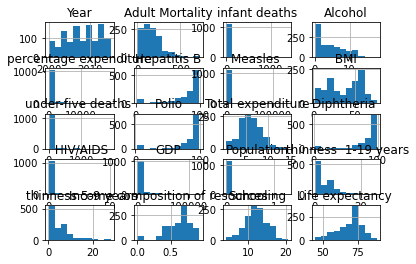

In [16]:
train_data.hist()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles '}>,
        <AxesSubplot:title={'center':' BMI '}>],
       [<AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria '}>],
       [<AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':' thinness  1-19 years'}>],
       [<AxesSubplot:title={'center':' thinness 5-9 years'}>,
        <AxesSubplot:title={'center':'Income composition of resourc

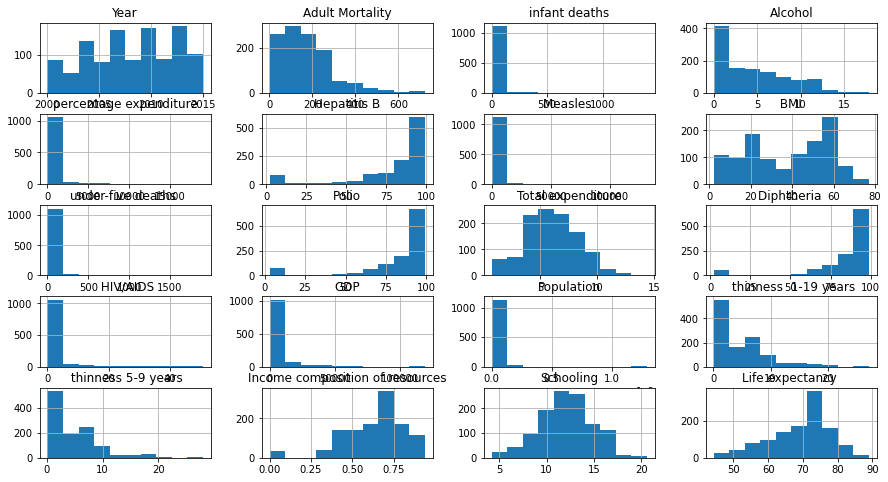

In [17]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

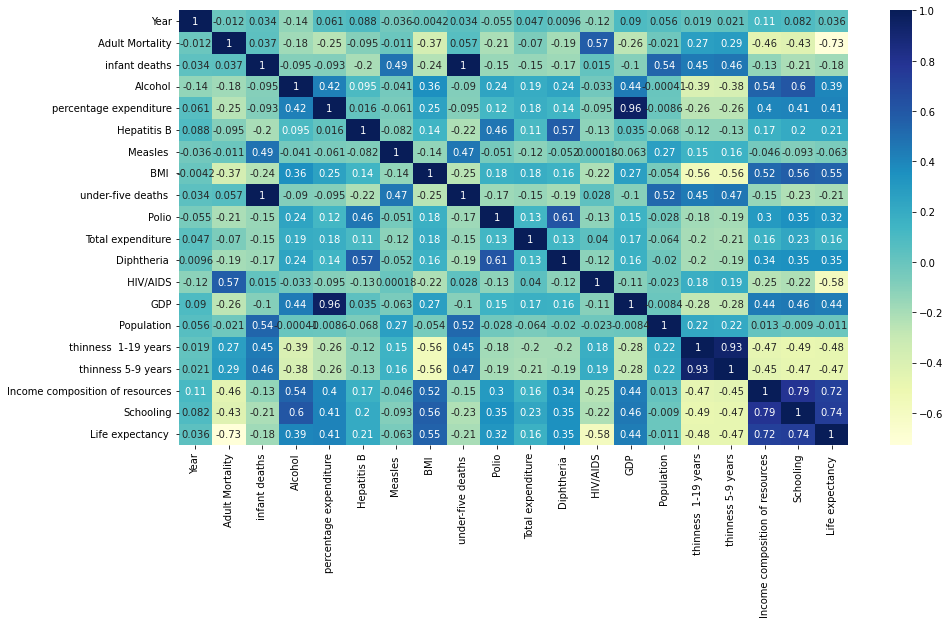

In [18]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Polio', ylabel='Year'>

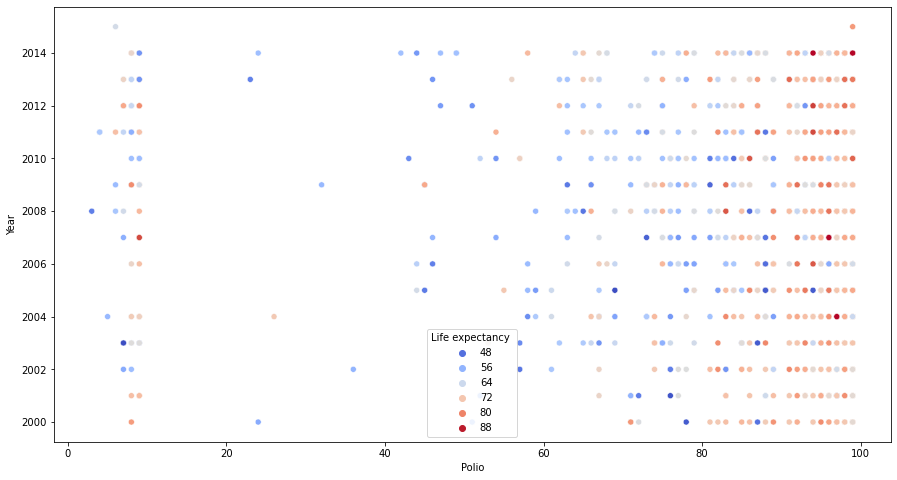

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Polio",y="Year",data=train_data,hue="Life expectancy ",palette="coolwarm")

In [24]:
train_data['Status'].replace(['Developing', 'Developed'], [0, 1], inplace=True)

In [25]:
train_data

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
1757,2006,0,133.0,22,0.58,127.763200,95.0,1217,49.9,25,...,5.23,97.0,0.1,2191.478567,3869346.00,6.4,6.3,0.575,10.0,71.0
1730,2001,0,266.0,2,2.87,61.849219,95.0,10677,39.1,3,...,5.45,95.0,0.1,524.145924,2419776.00,2.5,2.6,0.588,9.4,63.2
2048,2006,1,144.0,2,10.40,9.145556,98.0,120,56.0,3,...,6.17,99.0,0.1,94.772600,38141267.00,2.3,2.4,0.803,15.0,75.2
2450,2006,0,145.0,4,1.96,120.247171,98.0,0,17.2,5,...,4.60,98.0,0.1,1448.761100,1952.00,15.4,15.5,0.718,13.1,73.8
328,2007,0,16.0,0,5.16,8.240356,94.0,166,51.5,0,...,8.37,95.0,0.1,418.292176,3774.00,2.8,2.8,0.703,12.9,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2003,0,285.0,25,1.35,8.931827,73.0,217,19.7,40,...,4.63,73.0,2.1,519.292285,752555.00,9.1,9.0,0.416,7.7,55.8
500,2011,0,68.0,2,8.20,971.928038,7.0,803,64.7,2,...,1.82,87.0,0.1,5282.217600,3434278.00,0.5,0.5,0.903,15.9,81.5
201,2006,0,152.0,164,0.01,42.330455,86.0,6192,13.0,215,...,2.80,94.0,0.1,494.514660,1453684.00,19.7,2.3,0.506,8.4,68.2
2406,2002,0,459.0,54,7.04,346.531601,72.0,1043,41.6,79,...,8.90,7.0,26.6,2518.398261,45855482.88,14.5,17.1,0.620,12.9,54.9


In [26]:
from scipy.stats import skew, kurtosis
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imp_iter = IterativeImputer()
imputed_iter = imp_iter.fit_transform(train_data)
data_imp_iter = pd.DataFrame(imputed_iter, columns=train_data.columns)

imp_knn = KNNImputer()
imputed_knn = imp_knn.fit_transform(train_data)
data_imp_knn = pd.DataFrame(imputed_knn, columns=train_data.columns)

imp_mean = SimpleImputer(strategy='mean')
imputed_mean = imp_mean.fit_transform(train_data)
data_imp_mean = pd.DataFrame(imputed_mean, columns=train_data.columns)

imp_median = SimpleImputer(strategy='median')
imputed_median = imp_median.fit_transform(train_data)
data_imp_median = pd.DataFrame(imputed_median, columns=train_data.columns)

In [27]:
print(data_imp_iter.isnull().values.any(), data_imp_knn.isnull().values.any(),data_imp_mean.isnull().values.any(), data_imp_median.isnull().values.any())

False False False False


In [28]:
def draw_histplot():
    f, axes = plt.subplots(nrows=len(null_features), ncols=5, figsize=(24, len(null_features)*6))
    for x in range(0, len(null_features)):
        sns.histplot(train_data, x=null_features[x], kde=True, ax=axes[x, 0], color=color_pal[0])
        sns.histplot(data_imp_iter, x=null_features[x], kde=True, ax=axes[x, 1], color=color_pal[1])
        sns.histplot(data_imp_knn, x=null_features[x], kde=True, ax=axes[x, 2], color=color_pal[2])
        sns.histplot(data_imp_mean, x=null_features[x], kde=True, ax=axes[x, 3], color=color_pal[3])
        sns.histplot(data_imp_median, x=null_features[x], kde=True, ax=axes[x, 4], color=color_pal[4])
    for i, ax in enumerate(axes.reshape(-1)):
        if i % 5 == 0:
            selected_title = 'Before Imputation'
            selected_data = train_data[null_features[int(i/5)]].dropna()
        elif i % 5 == 1:
            selected_title = 'Iterative Imputation'
            selected_data = data_imp_iter[null_features[int(i/5)]]
        elif i % 5 == 2:
            selected_title = 'KNN Imputation'
            selected_data = data_imp_knn[null_features[int(i/5)]]
        elif i % 5 == 3:
            selected_title = 'Mean Imputation'
            selected_data = data_imp_mean[null_features[int(i/5)]]
        elif i % 5 == 4:
            selected_title = 'Median Imputation'
            selected_data = data_imp_median[null_features[int(i/5)]]
            ax.set_title(selected_title)
        ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % skew(selected_data),\
            fontsize=9, verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(selected_data),\
            fontsize=9, verticalalignment='top', horizontalalignment='right')

In [31]:
null_features = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, r2_score

color_pal = sns.color_palette(palette='muted')

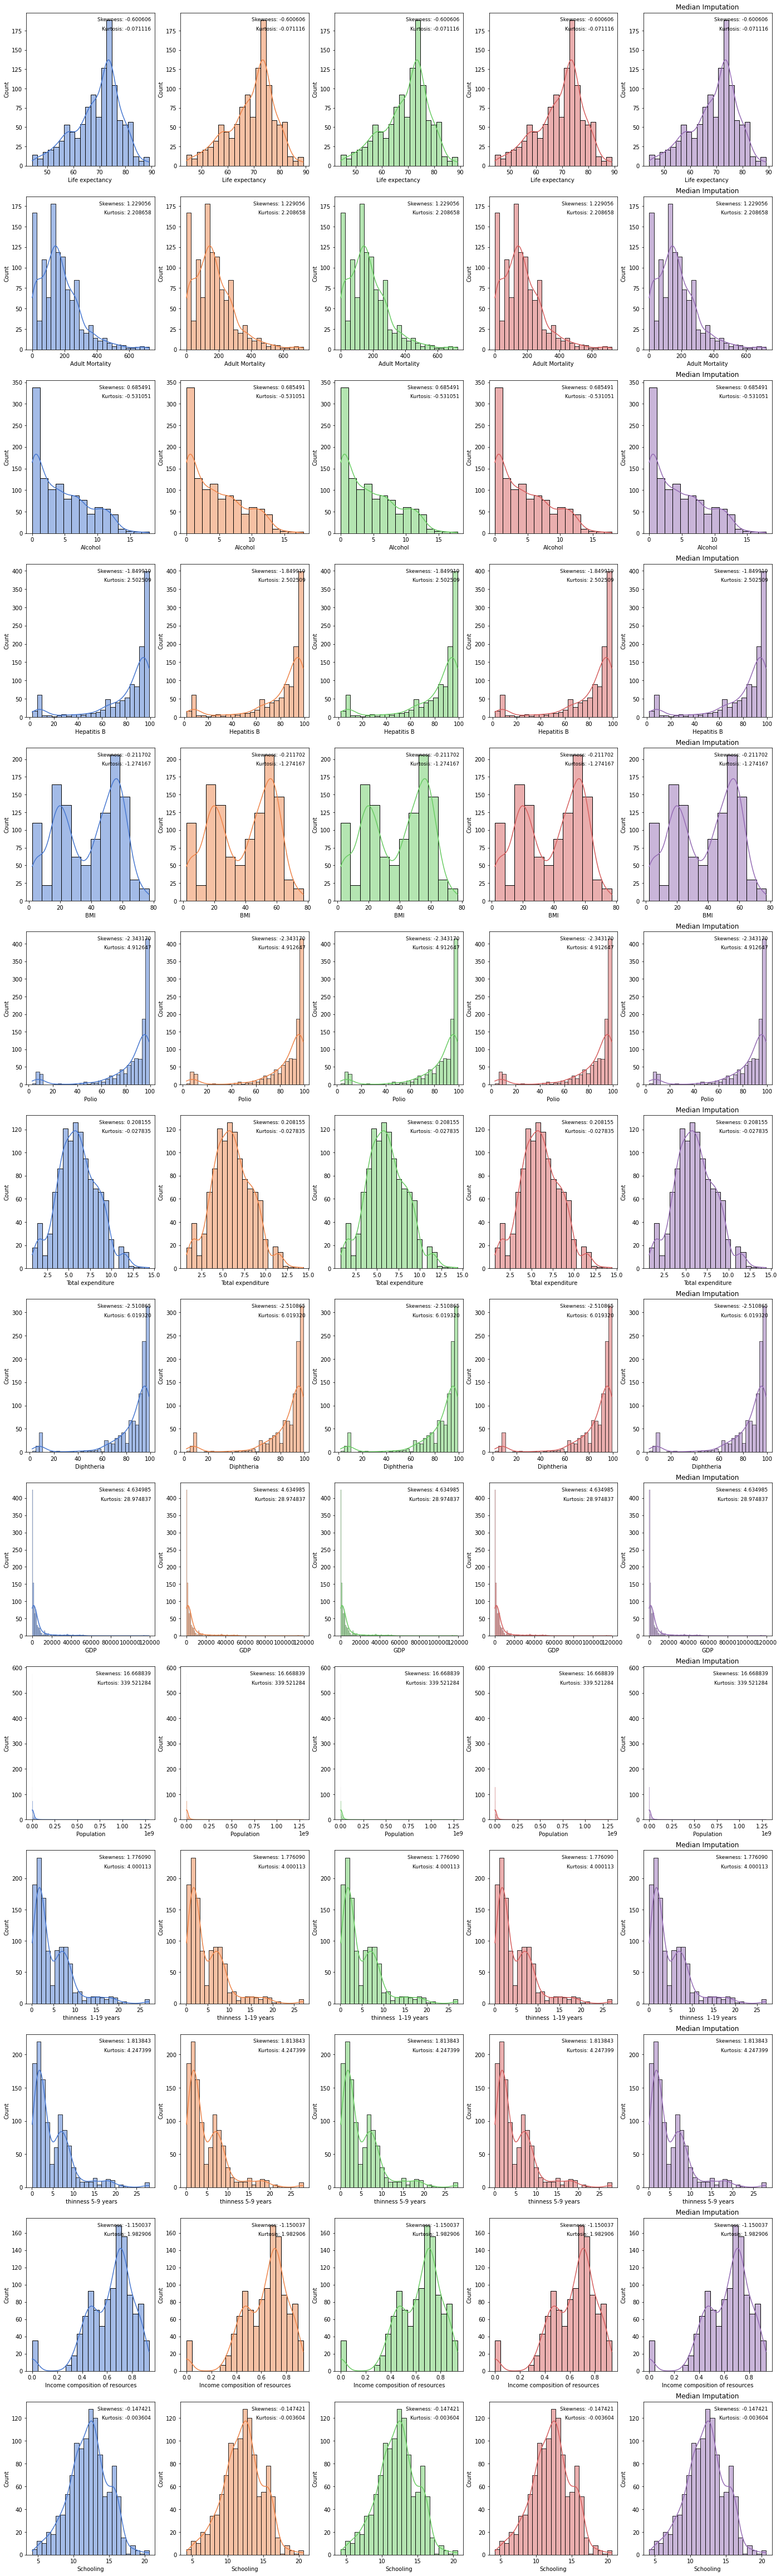

In [33]:
draw_histplot()

In [34]:
X_iter = data_imp_iter.drop(columns='Life expectancy ', axis=1, inplace=False)
y_iter = data_imp_iter['Life expectancy ']
X_knn = data_imp_knn.drop(columns='Life expectancy ', axis=1, inplace=False)
y_knn = data_imp_knn['Life expectancy ']
X_mean = data_imp_mean.drop(columns='Life expectancy ', axis=1, inplace=False)
y_mean = data_imp_mean['Life expectancy ']
X_median = data_imp_median.drop(columns='Life expectancy ', axis=1, inplace=False)
y_median = data_imp_median['Life expectancy ']

In [36]:
X_dict = {'iter': X_iter, 'knn': X_knn, 'mean': X_mean, 'median': X_median}
y_dict = {'iter': y_iter, 'knn': y_knn, 'mean': y_mean, 'median': y_median}
cv_scores = {'iter': [], 'knn': [], 'mean': [], 'median': []}
estimators = ['Linear Regression', 'Random Forest Regressor', 'K-Neighbors Regressor','Support Vector Regressor', 'XGB Regressor']

In [37]:
scaler = StandardScaler()

In [50]:
from xgboost import XGBRegressor

In [53]:
for imp_str in ['iter', 'knn', 'mean', 'median']:
    X_train, X_test, y_train, y_test = train_test_split(X_dict[imp_str], y_dict[imp_str], test_size=0.2, random_state=42)
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    lr = LinearRegression()
    cv_score = cross_val_score(lr, X_train_sc, y_train, scoring='r2', cv=10)
    
    cv_scores[imp_str].append(np.mean(cv_score))
    
    rfr = RandomForestRegressor(random_state=117)
    cv_score = cross_val_score(rfr, X_train_sc, y_train, scoring='r2', cv=10)
    cv_scores[imp_str].append(np.mean(cv_score))
    k_scores = []
    for k in range(1, 21):
        knr = KNeighborsRegressor(n_neighbors=k)
        cv_score = cross_val_score(knr, X_train_sc, y_train, scoring='r2', cv=10)
        k_scores.append(np.mean(cv_score))
    max_k_score = max(k_scores)
    cv_scores[imp_str].append(max_k_score)
    
    svr = SVR()
    cv_score = cross_val_score(svr, X_train_sc, y_train, scoring='r2', cv=10)
    cv_scores[imp_str].append(np.mean(cv_score))
    
    xgbr = XGBRegressor()
    cv_score = cross_val_score(xgbr, X_train_sc, y_train, scoring='r2', cv=10)
    cv_scores[imp_str].append(np.mean(cv_score))

In [61]:
y= train_data["Life expectancy "]
X=train_data.drop(["Life expectancy "], axis=1)

In [62]:
y.fillna(y.median(), inplace=True)

In [64]:
X.fillna(X.mean(), inplace=True)

In [65]:
train_data.corr()['Life expectancy '].nlargest(15)

Life expectancy                    1.000000
Schooling                          0.735376
Income composition of resources    0.721498
 BMI                               0.548675
Status                             0.446380
GDP                                0.439130
percentage expenditure             0.408276
Alcohol                            0.392796
Diphtheria                         0.349184
Polio                              0.324699
Hepatitis B                        0.208942
Total expenditure                  0.164200
Year                               0.035602
Population                        -0.010989
Measles                           -0.063460
Name: Life expectancy , dtype: float64

In [66]:
X.drop([ 'Status', 'Population'], axis=1, inplace= True) 

In [67]:
X.Year = pd.to_datetime(X.Year).dt.year

In [70]:
pip install category_encoders

In [71]:
import category_encoders as ce
bin_enc = ce.BinaryEncoder(drop_invariant=True)
X = bin_enc.fit_transform(X) 

In [74]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 
X = sc.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=9)

In [77]:
def fit_evaluate(models_dic, x_train, x_test, y_train, y_test):
    mae, rmse, train_acc, test_acc = [], [], [], []
    performance ={}
    
    for model in models.values():
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        mae.append(mean_absolute_error(y_test, prediction))
        rmse.append(mean_squared_error(y_test, prediction, squared=False))
        train_acc.append(model.score(x_train, y_train))
        test_acc.append(model.score(x_test, y_test))
    
    performance['mean_absolute_error'] = mae
    performance['mean_squared_error'] = rmse
    performance['train_accuracy'] = train_acc
    performance['test_accuracy'] = test_acc
    return pd.DataFrame(performance, index = models.keys())

In [78]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error , mean_squared_error

models = { 'Linear Reg' : LinearRegression(),
           'Ridge' : Ridge(),
           'Lasso' : Lasso(),
           'SVR' : SVR(),
           'Decision Tree' : DecisionTreeRegressor(),
           'RF' :RandomForestRegressor(), 
           'Ada Boost' : AdaBoostRegressor(),
           'Grad Boost' : GradientBoostingRegressor()}
results = fit_evaluate(models, X_train, X_test, y_train, y_test)  
results

,mean_absolute_error,mean_squared_error,train_accuracy,test_accuracy
Linear Reg,2.683649,3.501530,0.841461,0.838621
Ridge,2.642213,3.422788,0.840351,0.845798
Lasso,2.976108,3.841020,0.795959,0.805812
SVR,2.642880,4.008810,0.826479,0.788475
Decision Tree,1.604899,2.544820,1.000000,0.914760
RF,1.316389,1.910476,0.992549,0.951959
Ada Boost,2.421883,2.917433,0.914678,0.887971
Grad Boost,1.548370,2.069701,0.974983,0.943617


In [79]:
results.T

,Linear Reg,Ridge,Lasso,SVR,Decision Tree,RF,Ada Boost,Grad Boost
mean_absolute_error,2.683649,2.642213,2.976108,2.642880,1.604899,1.316389,2.421883,1.548370
mean_squared_error,3.501530,3.422788,3.841020,4.008810,2.544820,1.910476,2.917433,2.069701
train_accuracy,0.841461,0.840351,0.795959,0.826479,1.000000,0.992549,0.914678,0.974983
test_accuracy,0.838621,0.845798,0.805812,0.788475,0.914760,0.951959,0.887971,0.943617
